In [74]:
import tensorflow as tf
import os

In [75]:
# Avoid OOM errors
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove dodgy images 

In [76]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [77]:
data_dir = 'data'
os.listdir(data_dir)

['happy', 'sad']

In [78]:
image_exist = ['jpeg','jpg','bmp','png']

In [79]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exist:
                print(f"Image Not in exist list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

### Load Data

In [80]:
tf.keras.preprocessing.image_dataset_from_directory??

In [81]:
data = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,
                                                          label_mode = "binary",
                                                          batch_size = 32,
                                                          image_size = (256,256),
                                                          shuffle = True,
                                                          seed = 32)

Found 305 files belonging to 2 classes.


In [82]:
class_names = data.class_names
class_names

['happy', 'sad']

In [83]:
len(data)

10

In [85]:
10 * 32

320

In [86]:
for root, dirs, files in os.walk(data_dir):
    print(f"There are {len(files)} images in '{root}'.")

There are 0 images in 'data'.
There are 153 images in 'data\happy'.
There are 152 images in 'data\sad'.


Image batch shape : (32, 256, 256, 3)
Labels batch shape : (32, 1)


C:\Users\ROOT\AppData\Local\Temp\ipykernel_6260\3607068832.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Lable :" + str(labels_batch[i].numpy()) + class_names[int(labels_batch[i].numpy())])


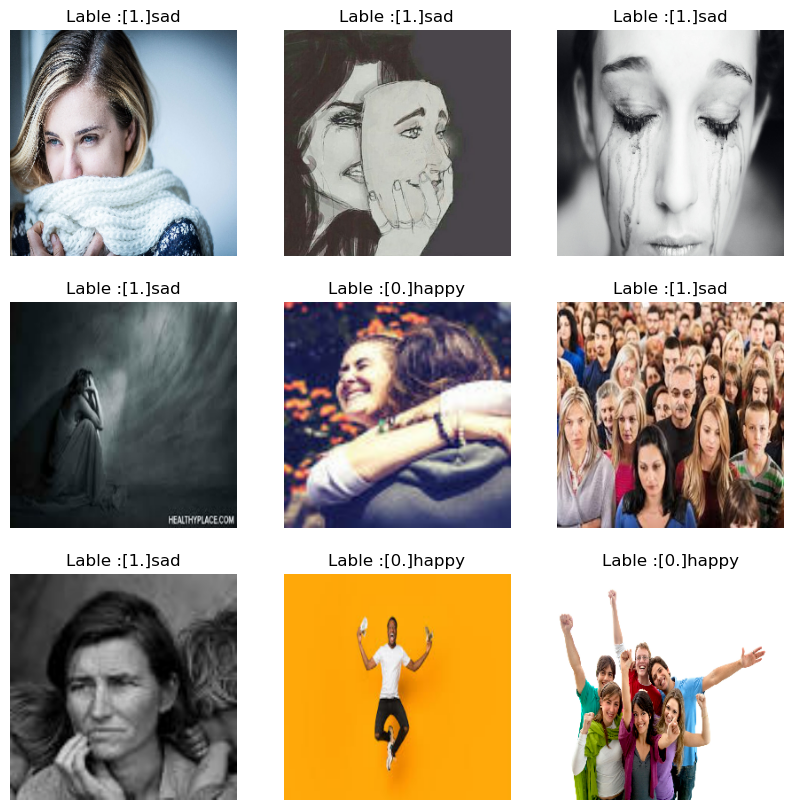

In [87]:
for image_batch, labels_batch in data.take(1):
    print(f"Image batch shape : {image_batch.shape}")
    print(f"Labels batch shape : {labels_batch.shape}")
    
    plt.figure(figsize = (10,10))
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title("Lable :" + str(labels_batch[i].numpy()) + class_names[int(labels_batch[i].numpy())])
        plt.axis("off")
        

### Preprocessing

In [88]:
dat_img = data.take(1)

for image_batch, labels_batch in dat_img:
    print(image_batch[0], image_batch[0].numpy().min(), image_batch[0].numpy().max())

tf.Tensor(
[[[178.       172.       150.      ]
  [177.74219  171.74219  149.74219 ]
  [176.57031  170.57031  148.57031 ]
  ...
  [143.42969  140.42969  123.42969 ]
  [142.25781  139.25781  122.25781 ]
  [142.       139.       122.      ]]

 [[177.91406  171.91406  149.91406 ]
  [177.65625  171.65625  149.65625 ]
  [176.48438  170.48438  148.48438 ]
  ...
  [143.55658  140.55658  123.55658 ]
  [142.35114  139.35114  122.351135]
  [142.08594  139.08594  122.08594 ]]

 [[177.52344  171.52344  149.52344 ]
  [177.26562  171.26562  149.26562 ]
  [176.09375  170.09375  148.09375 ]
  ...
  [144.13336  141.13336  124.13336 ]
  [142.77533  139.77533  122.77533 ]
  [142.47656  139.47656  122.47656 ]]

 ...

 [[111.38281   91.38281   64.38281 ]
  [111.46875   91.46875   64.46875 ]
  [111.859375  91.859375  64.859375]
  ...
  [107.68652   91.163086  59.7334  ]
  [ 84.493164  67.96973   36.54004 ]
  [ 79.390625  62.867188  31.4375  ]]

 [[109.42969   89.42969   62.429688]
  [109.515625  89.515625  

In [89]:
# Normalize data
data = data.map(lambda x,y: (x/255.,y)) # x images,y labels

In [59]:
dat_img = data.take(1)

for image_batch, labels_batch in dat_img:
    print(image_batch[0], image_batch[0].numpy().min(), image_batch[0].numpy().max())

tf.Tensor(
[[[0.95686275 0.99607843 0.9964461 ]
  [0.9632966  1.         0.9932598 ]
  [0.96862745 1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9603445  0.9995602  0.99822307]
  [0.96441686 1.         0.9943801 ]
  [0.96862745 1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9607843  1.         0.99822307]
  [0.96721816 1.         0.99718136]
  [0.96862745 1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1

Image batch shape : (32, 256, 256, 3)
Labels batch shape : (32, 1)


C:\Users\ROOT\AppData\Local\Temp\ipykernel_6260\2836932707.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Lable :" + str(labels_batch[i].numpy()) + class_names[int(labels_batch[i].numpy())])


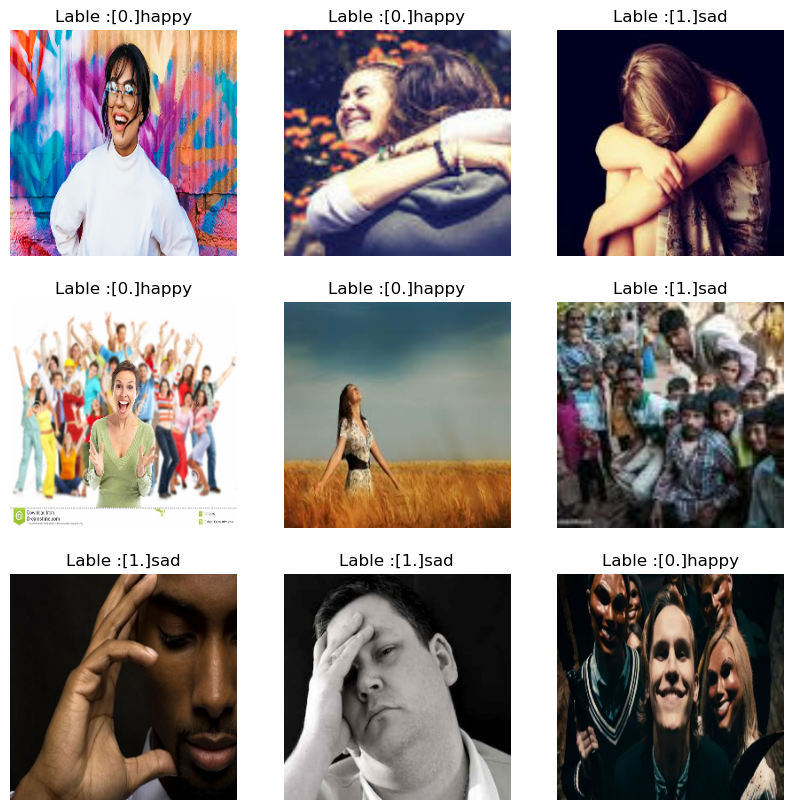

In [90]:
for image_batch, labels_batch in data.take(1):
    print(f"Image batch shape : {image_batch.shape}")
    print(f"Labels batch shape : {labels_batch.shape}")
    
    plt.figure(figsize = (10,10))
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow((image_batch[i]*255).numpy().astype('uint8'))
        plt.title("Lable :" + str(labels_batch[i].numpy()) + class_names[int(labels_batch[i].numpy())])
        plt.axis("off")

### Split data

In [91]:
len(data)

10

In [92]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*.1)

In [93]:
train_size, val_size, test_size

(7, 2, 1)

In [96]:
train_size+val_size+test_size

10

In [98]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## Deep Model

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
model = Sequential([
    Conv2D(16,(3,3),1,activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32,(3,3),1,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,(3,3),1,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [119]:
model.compile(loss="binary_crossentropy",
             optimizer='Adam',
             metrics = ['accuracy'])

In [120]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [121]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=2,
                               verbose=1,
                               mode='auto')

In [122]:
history = model.fit(train,
                     epochs = 100,
                     validation_data = val,
                     callbacks=[early_stopping])

Epoch 1/100
7/7 [==============================] - 10s 412ms/step - loss: 0.9538 - accuracy: 0.5134 - val_loss: 0.6759 - val_accuracy: 0.5156
Epoch 2/100
7/7 [==============================] - 4s 391ms/step - loss: 0.6719 - accuracy: 0.5268 - val_loss: 0.6431 - val_accuracy: 0.7500
Epoch 3/100
7/7 [==============================] - 4s 437ms/step - loss: 0.6076 - accuracy: 0.7054 - val_loss: 0.5227 - val_accuracy: 0.8750
Epoch 4/100
7/7 [==============================] - 4s 392ms/step - loss: 0.4657 - accuracy: 0.8214 - val_loss: 0.3118 - val_accuracy: 0.8906
Epoch 5/100
7/7 [==============================] - 4s 403ms/step - loss: 0.3677 - accuracy: 0.7991 - val_loss: 0.2049 - val_accuracy: 0.9062
Epoch 6/100
7/7 [==============================] - 4s 386ms/step - loss: 0.2271 - accuracy: 0.9286 - val_loss: 0.2513 - val_accuracy: 0.8906
Epoch 7/100
7/7 [==============================] - 4s 384ms/step - loss: 0.1598 - accuracy: 0.9509 - val_loss: 0.0923 - val_accuracy: 0.9844
Epoch 8/100


In [123]:
model.evaluate(test)

1/1 [==============================] - 2s 2s/step - loss: 0.0015 - accuracy: 1.0000


[0.0014779646880924702, 1.0]

<Axes: >

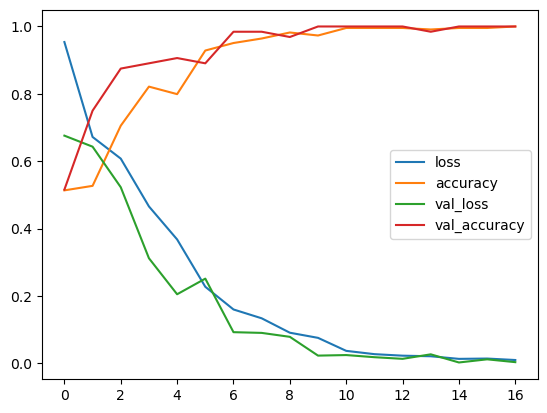

In [126]:
import pandas as pd
pd.DataFrame(history.history).plot()

## Transfer learning

In [132]:
from keras.applications.vgg16 import VGG16

In [135]:
base_model = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape = (256,256,3)) 

base_model.trainable = False

In [149]:
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [136]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [137]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation = 'sigmoid')
])

In [139]:
model.compile(
    loss="binary_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

In [140]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               8388864   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 8,389,121
Non-trainable params: 14,714,688
_________________________________________________________________


In [143]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1,
                               mode='auto')

In [144]:
history = model.fit(train,
                     epochs = 100,
                     validation_data = val,
                     callbacks=[early_stopping])

Epoch 1/100
7/7 [==============================] - 8s 908ms/step - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 2/100
7/7 [==============================] - 7s 902ms/step - loss: 0.0151 - accuracy: 0.9911 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 7s 902ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 8s 904ms/step - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 7s 903ms/step - loss: 0.0105 - accuracy: 0.9955 - val_loss: 0.0228 - val_accuracy: 0.9844
Epoch 6/100
7/7 [==============================] - 7s 902ms/step - loss: 0.0092 - accuracy: 0.9911 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/100
7/7 [==============================] - 7s 902ms/step - loss: 0.0053 - accuracy: 0.9955 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 8/100
7

In [145]:
model.evaluate(test)

1/1 [==============================] - 4s 4s/step - loss: 0.0161 - accuracy: 1.0000


[0.01608804427087307, 1.0]

<Axes: >

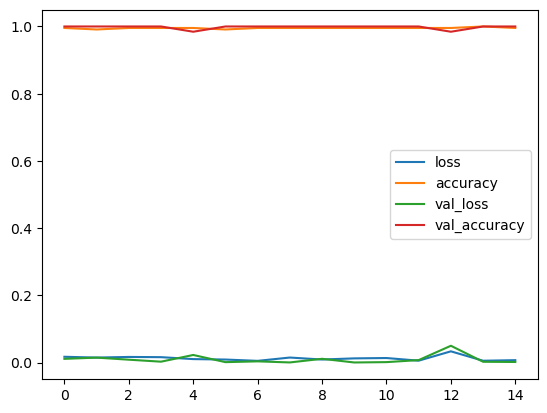

In [146]:
import pandas as pd
pd.DataFrame(history.history).plot()